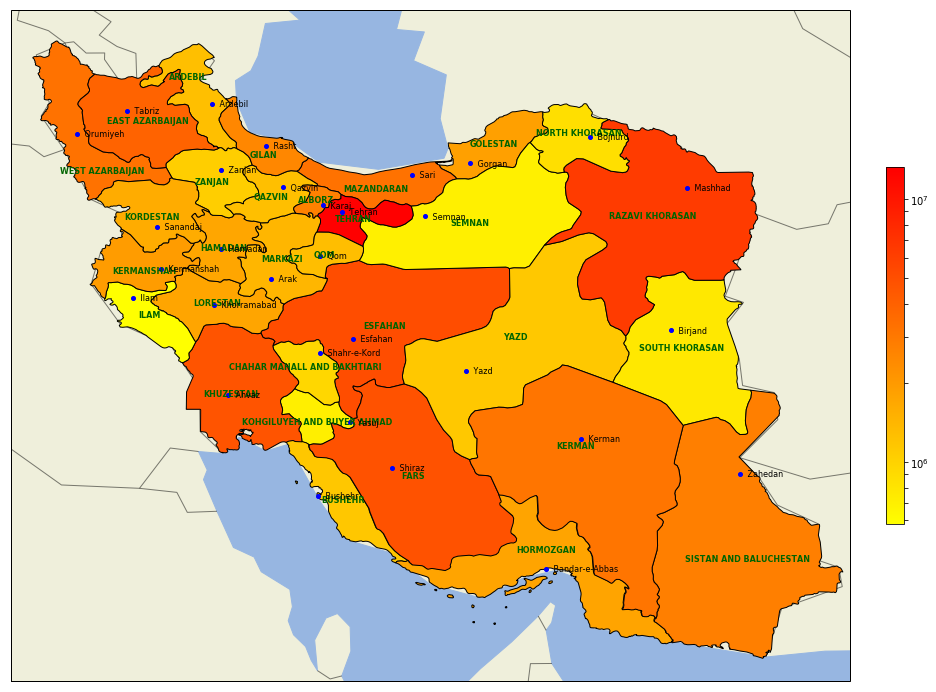

In [76]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

shpfilename = 'data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'  # http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
ProvinceInformation = 'data/ProvincePopulationsAndCoords.xlsx' # Downloaded from http://www.statoids.com/uir.html and merged with coordinates from google geocode (used google api) 

Capitals = pd.read_excel(ProvinceInformation,index_col=0) 
fig = pl.figure(figsize=(16,16))
ax = pl.axes(projection=ccrs.PlateCarree())

coords = (32.5,53.5) # Iran's geographic coordinates (N, E)
L = (8,10) # Size of the box to show (N, E)
ax.set_extent([coords[1]-L[1], coords[1]+L[1], coords[0]-L[0], coords[0]+L[0]])

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)


reader = shpreader.Reader(shpfilename)
provinces = [province for province in reader.records() if province.attributes['admin'] == 'Iran']


import matplotlib.cm as cm
import matplotlib.colors as mpc

norm = mpc.LogNorm(vmin=Capitals['Pop-2016'].min(),
                     vmax=Capitals['Pop-2016'].max(), 
                     clip=True)

sm = cm.ScalarMappable(norm=norm, cmap=cm.autumn_r)


for province in provinces:
    if province.attributes['name'] in Capitals.index:
        provincecolor = sm.to_rgba(Capitals.loc[province.attributes['name'],'Pop-2016'])
    else:
        provincecolor = 'linen'  
    ax.add_geometries(province.geometry, ccrs.PlateCarree(),
                      facecolor=provincecolor,edgecolor='black',
                      label=province.attributes['name'])
    
    pl.text(province.attributes['longitude'],
            province.attributes['latitude'],
            province.attributes['name'].upper(),
            color='darkgreen',ha='center',
            va='center',fontsize=8,fontweight='bold')
    
    if province.attributes['name'] in Capitals.index:
        capital = Capitals.loc[province.attributes['name']]

        pl.text(capital['longitude'],
            capital['latitude'],
            '   '+capital['Capital'],
            color='black',ha='left',
            va='center',fontsize=8)
        
        pl.plot(capital['longitude'],capital['latitude'],'bo',markersize=4)
        
sm._A = []
cb = pl.colorbar(sm,fraction=0.02, pad=0.04)